In [1]:
from env.res_env_evil import ResistanceEvilEnv
from env.res_env import ResistanceEnv

import numpy as np
import os
from utils.buffer import SharedReplayBuffer
import numpy as np
from runner.runner_res_evil_trainer import RunnerMA_Evil
from runner.runner_res import RunnerMA

from alg.actor_critic import Actor, Critic

In [2]:
### Restore Good policy

In [3]:
# Example configuration
class Args:
    def __init__(self):
        self.env_name = 'Resistance Evil Env'
        self.algorithm_name = 'MAPPO'
        self.experiment_name = 'Res Experience'
        self.use_centralized_V = True
        self.num_env_steps = 7
        self.episode_length = 7
        self.n_rollout_threads = 1
        self.use_linear_lr_decay = False
        self.hidden_size = 64
        self.gamma = .99
        self.gae_lambda = .95
        self._use_gae = True
        self.actor_lr = 7e-4
        self.critic_lr = 1e-3
        self.opti_eps=1e-5
        self.weight_decay=0
        self.gamma=0.99
        self.clip_param=0.2
        self.value_loss_coef=1
        self.entropy_coef=0.01
        self.ppo_epoch=10
        self.num_mini_batch=1
        self.huber_delta=10.0
        self.use_huber_loss=True
        self.use_clipped_value_loss=True
        self.gain = 0.01
        self.use_orthogonal = True
        self.use_feature_normalization = True
        self.use_ReLU = True
        self.layer_N = 1
        self.log_interval = 1000  # log every x steps
        
env = ResistanceEnv()

config = {
    'all_args': Args(),
    'env': env,
    'device': 'cpu',
    'num_agents': 1,
}
runner_good = RunnerMA(config)
runner_good.restore('save_dir')
good_policy = runner_good.trainer.policy

In [4]:
### Set Up

In [5]:
# Example configuration
class Args:
    def __init__(self):
        self.env_name = 'Resistance Evil Env'
        self.algorithm_name = 'MAPPO'
        self.experiment_name = 'Res Experience'
        self.use_centralized_V = True
        self.num_env_steps = 200000
        self.episode_length = 10000
        self.n_rollout_threads = 1
        self.use_linear_lr_decay = False
        self.hidden_size = 64
        self.gamma = .99
        self.gae_lambda = .95
        self._use_gae = True
        self.actor_lr = 7e-4
        self.critic_lr = 1e-3
        self.opti_eps=1e-5
        self.weight_decay=0
        self.gamma=0.99
        self.clip_param=0.2
        self.value_loss_coef=1
        self.entropy_coef=0.01
        self.ppo_epoch=10
        self.num_mini_batch=1
        self.huber_delta=10.0
        self.use_huber_loss=True
        self.use_clipped_value_loss=True
        self.gain = 0.01
        self.use_orthogonal = True
        self.use_feature_normalization = True
        self.use_ReLU = True
        self.layer_N = 1
        self.log_interval = 1000  # log every x steps
        
env = ResistanceEvilEnv()

config = {
    'all_args': Args(),
    'env': env,
    'device': 'cpu',
    'num_agents': 2,
    'good_policy': good_policy
}
runner = RunnerMA_Evil(config)

In [6]:
runner.restore('save_dir')


0 / 20 episodes, total number of timesteps: 10000/200000, FPS 890. 
average episode rewards is -2195.0000524520874 (av.reward: -0.21950000524520874 * ep_length 10000)

1 / 20 episodes, total number of timesteps: 20000/200000, FPS 889. 
average episode rewards is -1665.0000214576721 (av.reward: -0.1665000021457672 * ep_length 10000)

2 / 20 episodes, total number of timesteps: 30000/200000, FPS 894. 
average episode rewards is -1828.9999663829803 (av.reward: -0.18289999663829803 * ep_length 10000)

3 / 20 episodes, total number of timesteps: 40000/200000, FPS 896. 
average episode rewards is -1845.9999561309814 (av.reward: -0.18459999561309814 * ep_length 10000)

4 / 20 episodes, total number of timesteps: 50000/200000, FPS 897. 
average episode rewards is -1627.9999911785126 (av.reward: -0.16279999911785126 * ep_length 10000)

5 / 20 episodes, total number of timesteps: 60000/200000, FPS 898. 
average episode rewards is -1164.0000343322754 (av.reward: -0.11640000343322754 * ep_length 

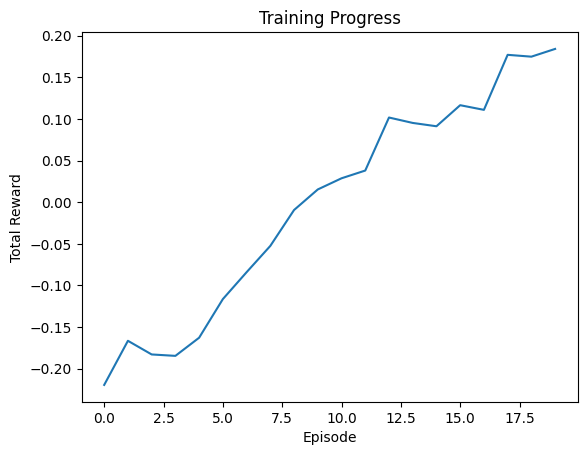

In [7]:
runner.run(verbose=False)

In [8]:
#runner.save()

In [9]:
runner.eval(100, verbose=False)

Episode 1: Reward = 20, Number of steps: 27
=======  EPISODE END  ================

Episode 2: Reward = 22, Number of steps: 26
=======  EPISODE END  ================

Episode 3: Reward = 22, Number of steps: 28
=======  EPISODE END  ================

Episode 4: Reward = 24, Number of steps: 19
=======  EPISODE END  ================

Episode 5: Reward = -22, Number of steps: 36
=======  EPISODE END  ================

Episode 6: Reward = 22, Number of steps: 28
=======  EPISODE END  ================

Episode 7: Reward = -24, Number of steps: 19
=======  EPISODE END  ================

Episode 8: Reward = 24, Number of steps: 23
=======  EPISODE END  ================

Episode 9: Reward = 24, Number of steps: 23
=======  EPISODE END  ================

Episode 10: Reward = 24, Number of steps: 17
=======  EPISODE END  ================

Episode 11: Reward = 24, Number of steps: 17
=======  EPISODE END  ================

Episode 12: Reward = 20, Number of steps: 37
=======  EPISODE END  =====